In [16]:
import json
import os

import matplotlib.pyplot as plt
import pandas as pd

In [23]:
benchmark_results_dir = "../benchmarks/latency"

data = []
for filename in os.listdir(benchmark_results_dir):
    with open(os.path.join(benchmark_results_dir, filename), "r") as f:
        row = json.load(f)
    # select specifc keys from data
    row = {k: row[k] for k in ["num_steps", "action_horizon", "request_rate", "request_throughput", "mean_latency_ms", "median_latency_ms", "std_latency_ms", "p95_latency_ms", "p99_latency_ms"]}
    data.append(row)
df = pd.DataFrame(data)

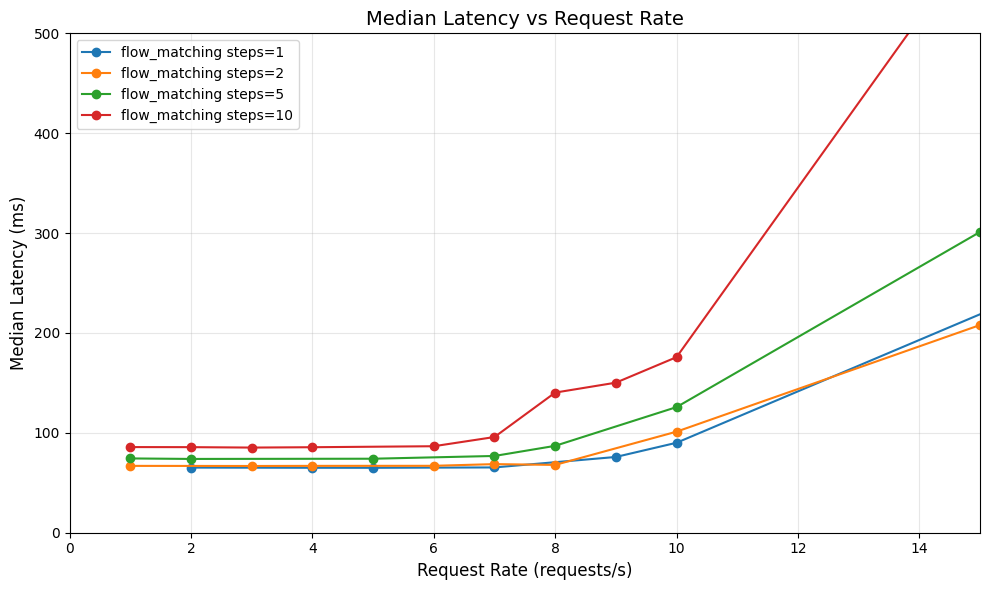

In [28]:
# Create the plot
plt.figure(figsize=(10, 6))

# Get unique num_steps values
num_steps_values = sorted(df['num_steps'].unique())

# Plot a line for each num_steps value
for num_steps in num_steps_values:
    df_filtered = df[df['num_steps'] == num_steps].sort_values('request_rate')
    plt.plot(df_filtered['request_rate'], df_filtered['median_latency_ms'], 
             marker='o', label=f'flow_matching steps={num_steps}')

plt.xlim(0, 15)
plt.ylim(0, 500)
plt.xlabel('Request Rate (requests/s)', fontsize=12)
plt.ylabel('Median Latency (ms)', fontsize=12)
plt.title('Median Latency vs Request Rate', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [34]:
df[df['num_steps'] == 10]["request_throughput"].max()

12.795993375851216